In [79]:
import numpy as np  
import pandas as pd  

In [143]:
#importing Dataset
dataset = pd.read_excel(r'F:\Project\Machine Learning & Artificial Intelligence\Project 1-Major Depressive Disorder\Dataset\delta_pow.xlsx')
dataset.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,ch15,ch16,ch17,ch18,ch19,classifier
0,0.000859,0.007251,0.031355,0.969053,0.030961,0.969093,0.923795,0.997378,0.993423,0.033978,0.002136,0.004511,0.009684,0.989910,0.009908,0.989967,0.721588,0.996737,0.996322,0
1,0.000004,0.019063,0.112936,0.890142,0.109903,0.890142,0.920085,0.999242,0.945558,0.119978,0.000006,0.021626,0.122571,0.881118,0.118815,0.881117,0.705132,0.999314,0.926128,0
2,0.000012,0.042204,0.196819,0.806375,0.193586,0.806375,0.920142,0.996710,0.880374,0.210215,0.000013,0.039009,0.178987,0.824861,0.174958,0.824861,0.705226,0.998066,0.881943,1
3,0.000051,0.009729,0.050948,0.950224,0.049838,0.950226,0.920380,0.997855,0.984149,0.054583,0.000474,0.014549,0.047543,0.952641,0.047267,0.952653,0.709674,0.998886,0.976715,0
4,0.119989,1.000000,0.139289,0.635711,0.358702,0.641380,1.000000,0.000000,0.768229,0.390370,0.309826,1.000000,0.067497,0.734294,0.257425,0.742593,0.986523,0.000000,0.843195,0


In [144]:
#seeing the charts
X=dataset.iloc[:,0:19]
X.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,ch15,ch16,ch17,ch18,ch19
0,0.000859,0.007251,0.031355,0.969053,0.030961,0.969093,0.923795,0.997378,0.993423,0.033978,0.002136,0.004511,0.009684,0.989910,0.009908,0.989967,0.721588,0.996737,0.996322
1,0.000004,0.019063,0.112936,0.890142,0.109903,0.890142,0.920085,0.999242,0.945558,0.119978,0.000006,0.021626,0.122571,0.881118,0.118815,0.881117,0.705132,0.999314,0.926128
2,0.000012,0.042204,0.196819,0.806375,0.193586,0.806375,0.920142,0.996710,0.880374,0.210215,0.000013,0.039009,0.178987,0.824861,0.174958,0.824861,0.705226,0.998066,0.881943
3,0.000051,0.009729,0.050948,0.950224,0.049838,0.950226,0.920380,0.997855,0.984149,0.054583,0.000474,0.014549,0.047543,0.952641,0.047267,0.952653,0.709674,0.998886,0.976715
4,0.119989,1.000000,0.139289,0.635711,0.358702,0.641380,1.000000,0.000000,0.768229,0.390370,0.309826,1.000000,0.067497,0.734294,0.257425,0.742593,0.986523,0.000000,0.843195


In [145]:
y=dataset.iloc[:,19]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: classifier, dtype: int64

In [146]:
from scipy.stats import norm

In [147]:
#Apply MLE as Channel Selection
mean=X.mean()
mean.head()

ch1    0.026200
ch2    0.083732
ch3    0.230030
ch4    0.764660
ch5    0.234114
dtype: float64

In [148]:
std=X.std()
std.head()

ch1    0.133380
ch2    0.144143
ch3    0.214471
ch4    0.212842
ch5    0.212788
dtype: float64

In [149]:
normal=norm.cdf(X,loc=mean,scale=std)
normal

array([[0.42466055, 0.29785088, 0.1771324 , ..., 0.52113999, 0.62078978,
        0.82060722],
       [0.42215024, 0.32684514, 0.29254397, ..., 0.46302673, 0.62626465,
        0.72402062],
       [0.42217383, 0.38663344, 0.43846952, ..., 0.46335782, 0.62361632,
        0.65232415],
       ...,
       [0.42215462, 0.34246113, 0.34971395, ..., 0.46323927, 0.6259123 ,
        0.70941022],
       [0.42217555, 0.43202426, 0.58005826, ..., 0.46510228, 0.54558267,
        0.19450494],
       [0.42216731, 0.37905384, 0.4096899 , ..., 0.46431145, 0.58804851,
        0.42102667]])

In [150]:
df=pd.DataFrame(normal)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.424661,0.297851,0.177132,0.831548,0.169859,0.830210,0.540536,6.099881e-01,0.781962,0.159130,0.394781,0.286310,0.143375,0.865870,0.133491,0.866521,0.521140,6.207898e-01,0.820607
1,0.422150,0.326845,0.292544,0.722256,0.279700,0.720368,0.528346,6.152075e-01,0.710005,0.273891,0.389933,0.318867,0.286091,0.731559,0.268843,0.731231,0.463027,6.262647e-01,0.724021
2,0.422174,0.386633,0.438470,0.577692,0.424473,0.575440,0.528534,6.081135e-01,0.597310,0.426779,0.389948,0.353428,0.376477,0.642217,0.358751,0.641120,0.463358,6.236163e-01,0.652324
3,0.422288,0.303837,0.201861,0.808352,0.193243,0.806844,0.529316,6.113274e-01,0.768877,0.183281,0.390995,0.305215,0.184740,0.826230,0.173436,0.826623,0.479041,6.253572e-01,0.796024
4,0.759026,1.000000,0.336114,0.272309,0.720896,0.279201,0.767835,1.176627e-12,0.389048,0.741172,0.940056,0.999999,0.209261,0.482795,0.504812,0.495384,0.991819,6.784898e-08,0.584486


In [151]:
lh=np.product(df)
lh

0     1.045514e-21
1     6.894059e-23
2     7.874622e-25
3     5.093424e-28
4     7.565837e-25
5     4.984051e-28
6     8.926668e-30
7     1.867560e-29
8     2.728511e-28
9     5.164335e-25
10    5.964451e-23
11    2.621182e-23
12    3.038985e-25
13    8.227365e-28
14    3.179207e-25
15    8.319427e-28
16    4.586097e-28
17    3.531666e-29
18    4.617443e-28
dtype: float64

In [152]:
llh=np.log(lh)
llh

0    -48.309778
1    -51.028797
2    -55.500982
3    -62.844432
4    -55.540984
5    -62.866140
6    -66.888510
7    -66.150335
8    -63.468627
9    -55.922851
10   -51.173640
11   -51.995832
12   -56.453104
13   -62.364917
14   -56.407995
15   -62.353789
16   -62.949353
17   -65.513198
18   -62.942542
dtype: float64

In [153]:
median=llh.median()
median

-62.353789235482964

In [154]:
llh=abs(llh)
median=abs(median)
c=llh.count()
n=int(c)
a=[]
b=[]
k=1
for i in range(1, n+1):
	a.append(i)
if c>10:
   ax=5
else:
   ax=1     

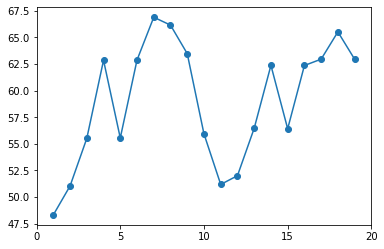

In [155]:
import matplotlib.pyplot as plt  
plt.plot(a,llh, marker='o')
plt.xticks(np.arange(0, c+ax,ax))
plt.show()

In [156]:
for j in range(1, n):
    if llh[j]>median:
        m=a[j]
        b.insert(k,m)
        k=k+1
print(k-1, " features/attributes selected")
print(b, "indices are selected")

9  features/attributes selected
[4, 6, 7, 8, 9, 14, 17, 18, 19] indices are selected


In [157]:
X=dataset.iloc[:,b]
X.head()

,ch5,ch7,ch8,ch9,ch10,ch15,ch18,ch19,classifier
0,0.030961,0.923795,0.997378,0.993423,0.033978,0.009908,0.996737,0.996322,0
1,0.109903,0.920085,0.999242,0.945558,0.119978,0.118815,0.999314,0.926128,0
2,0.193586,0.920142,0.996710,0.880374,0.210215,0.174958,0.998066,0.881943,1
3,0.049838,0.920380,0.997855,0.984149,0.054583,0.047267,0.998886,0.976715,0
4,0.358702,1.000000,0.000000,0.768229,0.390370,0.257425,0.000000,0.843195,0


In [158]:
#splitting Dataset into train & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) 

In [159]:
#applying KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [160]:
classifier=KNeighborsClassifier(n_neighbors=9)
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [164]:
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [165]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7, 0],
       [0, 5]], dtype=int64)

In [166]:
a=cm[0][0]
b=cm[0][1]
c=cm[1][0]
d=cm[1][1]
#calculation Error,Accuracy,Sensitivity and Prediction
Err=(b+c)/(a+b+c+d)
Acc=(a+d)/(a+b+c+d)
SN=a/(a+c)
Prec=a/(a+b)
print(cm)
print('Accuracy=',Acc*100,'%')
print('Error=',Err*100,'%')
print('Sensitivity=',SN*100,'%')
print('Prediction=',Prec*100,'%')

[[7 0]
 [0 5]]
Accuracy= 100.0 %
Error= 0.0 %
Sensitivity= 100.0 %
Prediction= 100.0 %
